# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, filters, io, morphology, color, util
from skimage.morphology import disk, square, diamond, star


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

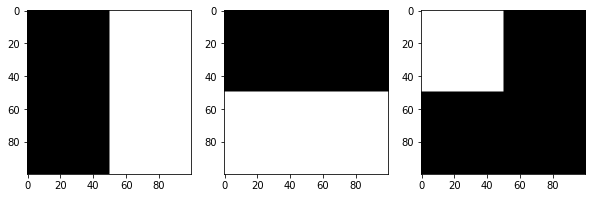

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


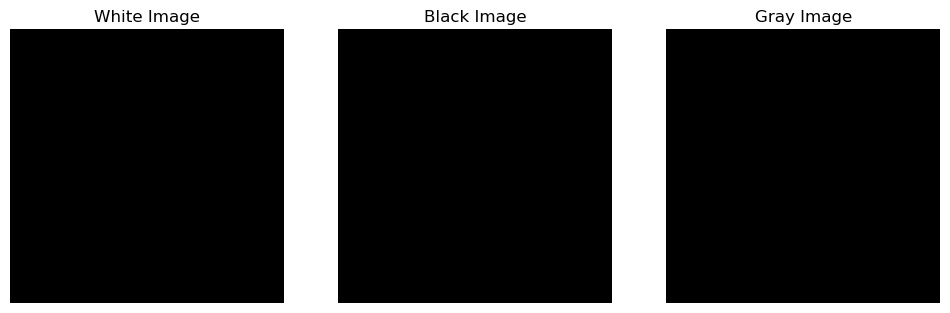

In [25]:
# Create 100x100 images with different values
image1 = np.ones((100, 100))  # White image
image2 = np.zeros((100, 100))  # Black image
image3 = np.full((100, 100), 0.5)  # Gray image

# Display images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["White Image", "Black Image", "Gray Image"]
for ax, img, title in zip(axes, [image1, image2, image3], titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
plt.show()


*   Use the above three images to create the following image

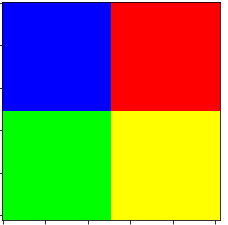
*Hint: Remember channels and color spaces*

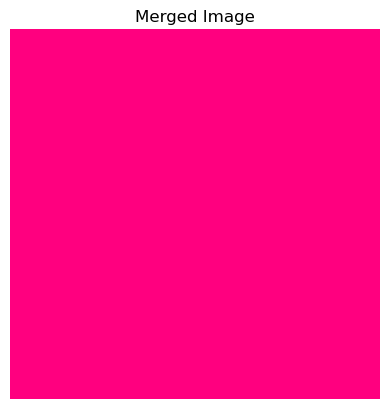

In [26]:
# Merge three grayscale images into an RGB image
merged_image = np.dstack((image1, image2, image3))

# Show merged image
plt.imshow(merged_image)
plt.title("Merged Image")
plt.axis("off")
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

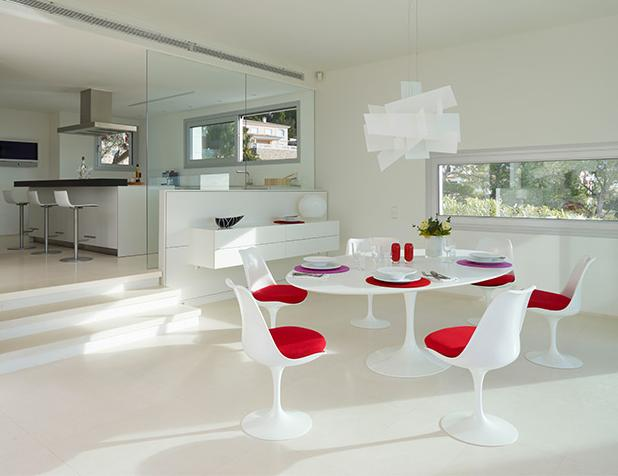

*   Extract individual channels and plot them using matplotlib subplot.



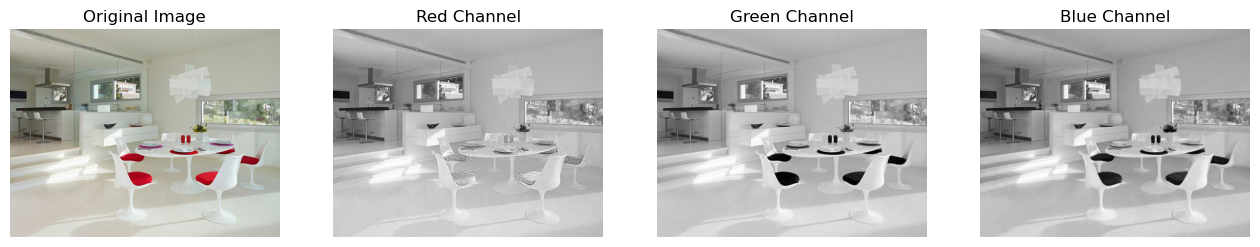

In [27]:
# Read image
image = io.imread("images/sillas.jpg")

# Extract RGB channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Display channels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

titles = ["Red Channel", "Green Channel", "Blue Channel"]
channels = [red_channel, green_channel, blue_channel]

for i in range(3):
    axes[i+1].imshow(channels[i], cmap="gray")
    axes[i+1].set_title(titles[i])
    axes[i+1].axis("off")

plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

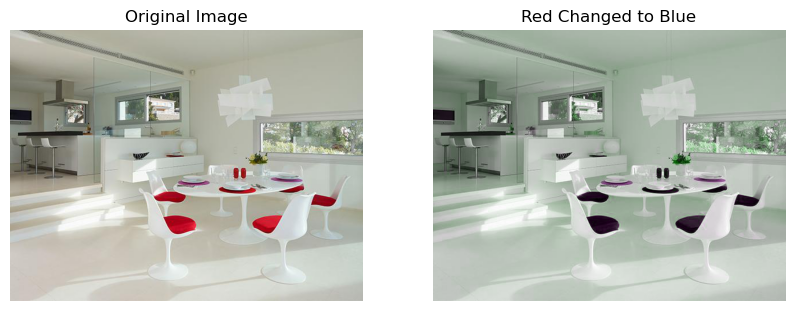

In [28]:
# Swap red and blue channels
image_swapped = image.copy()
image_swapped[:, :, 0], image_swapped[:, :, 2] = image_swapped[:, :, 2], image_swapped[:, :, 0]

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(image_swapped)
axes[1].set_title("Red Changed to Blue")
axes[1].axis("off")

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

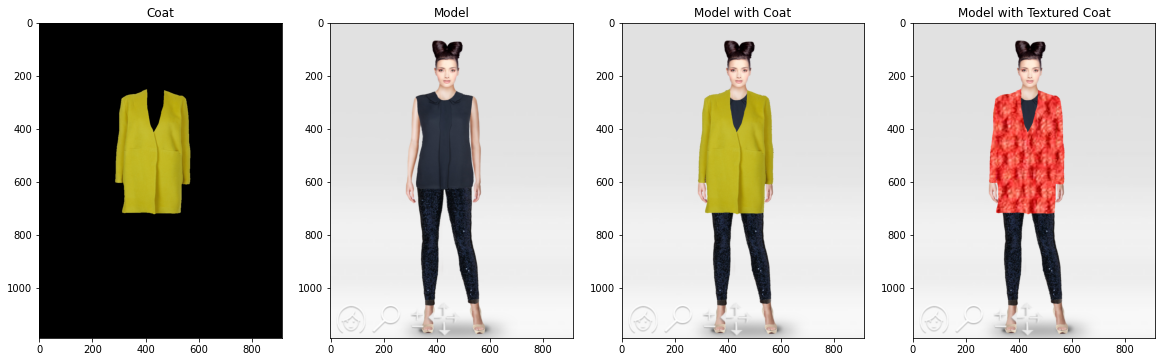

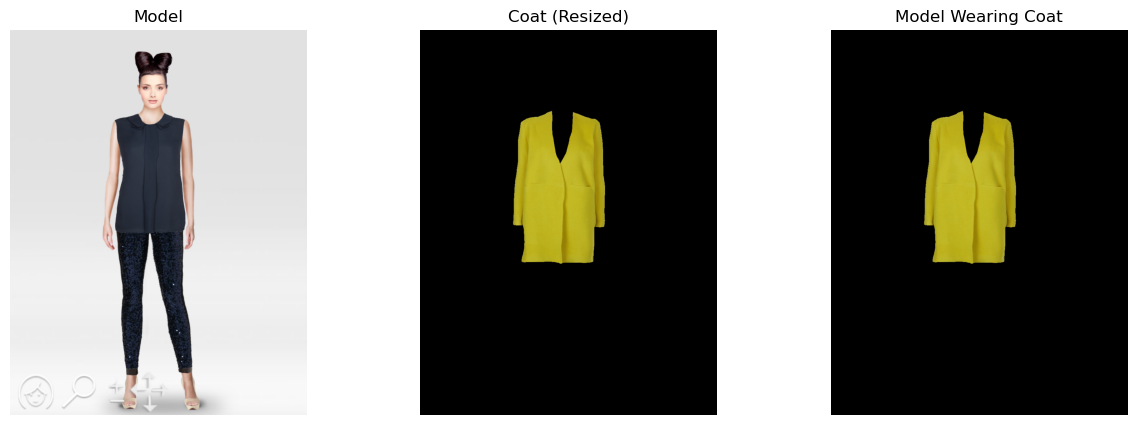

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize

# Load images
model = io.imread("images/model.png")
coat = io.imread("images/coat.png")

# Convert grayscale images to RGB if necessary
if len(coat.shape) == 2:
    coat = color.gray2rgb(coat)
if len(model.shape) == 2:
    model = color.gray2rgb(model)

# If images have 4 channels (RGBA), remove the Alpha channel
if coat.shape[-1] == 4:
    coat = coat[:, :, :3]  # Convert to RGB
if model.shape[-1] == 4:
    model = model[:, :, :3]  # Convert to RGB

# Resize coat to match model dimensions
coat = resize(coat, model.shape[:2], anti_aliasing=True, preserve_range=True).astype(np.uint8)

# Create binary mask for the coat (avoid pure white pixels)
mask = np.all(coat < [250, 250, 250], axis=-1)

# Apply mask - Ensure dimensions match
model_with_coat = model.copy()
model_with_coat[mask] = coat[mask]

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(model)
axes[0].set_title("Model")
axes[0].axis("off")

axes[1].imshow(coat)
axes[1].set_title("Coat (Resized)")
axes[1].axis("off")

axes[2].imshow(model_with_coat)
axes[2].set_title("Model Wearing Coat")
axes[2].axis("off")

plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




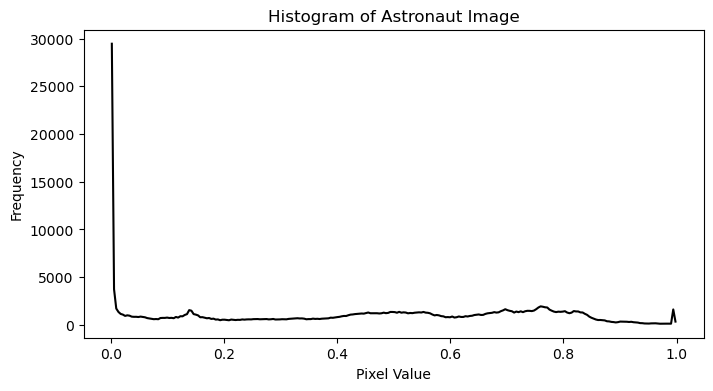

In [30]:
# Read image and convert to grayscale
astro = color.rgb2gray(data.astronaut())

# Compute histogram
hist, bins = exposure.histogram(astro)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.plot(bins, hist, color="black")
plt.title("Histogram of Astronaut Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

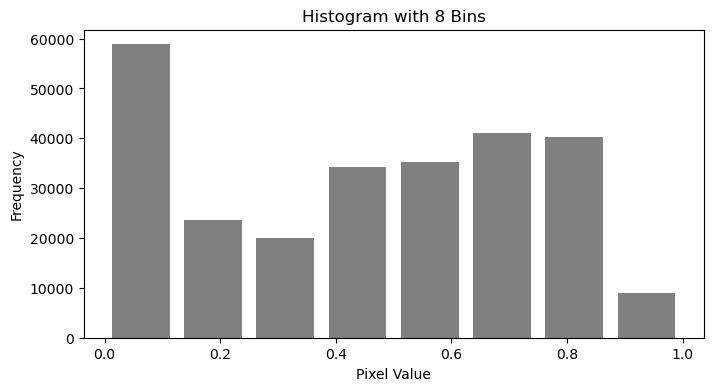

In [31]:
# Compute histogram with 8 bins
hist_8, bins_8 = exposure.histogram(astro, nbins=8)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.bar(bins_8, hist_8, width=0.1, color="gray")
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


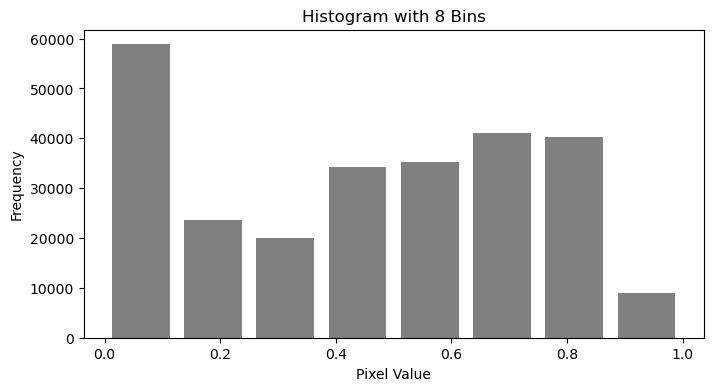

In [32]:
# Compute histogram with 8 bins
hist_8, bins_8 = exposure.histogram(astro, nbins=8)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.bar(bins_8, hist_8, width=0.1, color="gray")
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



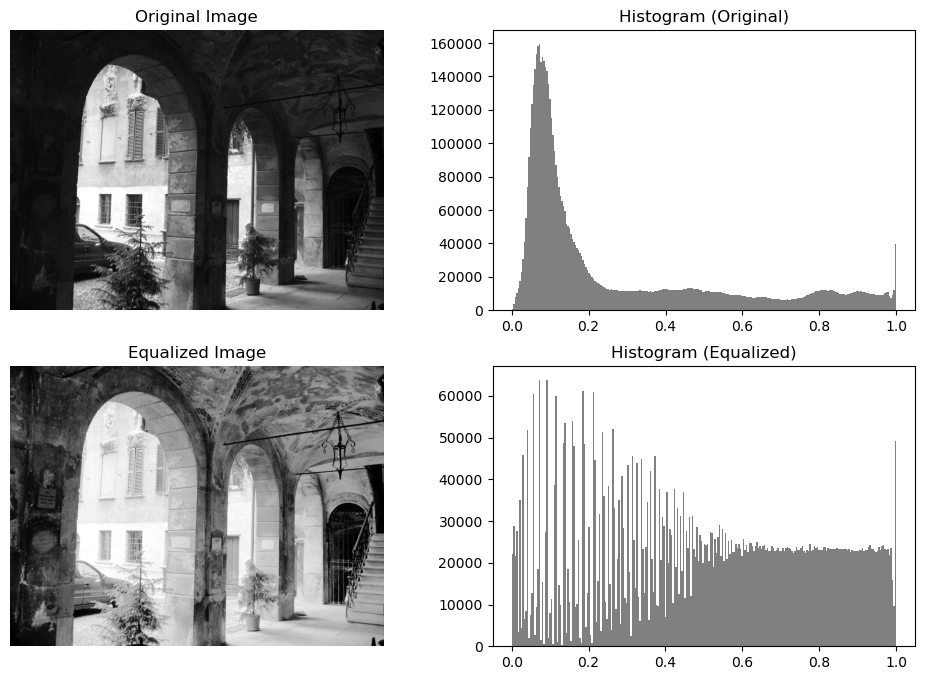

In [33]:
# Read image and convert to grayscale
image = io.imread("images/aquatermi_lowcontrast.jpg")
image_gray = color.rgb2gray(image)

# Perform histogram equalization
equalized = exposure.equalize_hist(image_gray)

# Plot original and equalized histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(image_gray, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of Original Image
axes[0, 1].hist(image_gray.ravel(), bins=256, color="gray")
axes[0, 1].set_title("Histogram (Original)")

# Equalized Image
axes[1, 0].imshow(equalized, cmap="gray")
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Histogram of Equalized Image
axes[1, 1].hist(equalized.ravel(), bins=256, color="gray")
axes[1, 1].set_title("Histogram (Equalized)")

plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



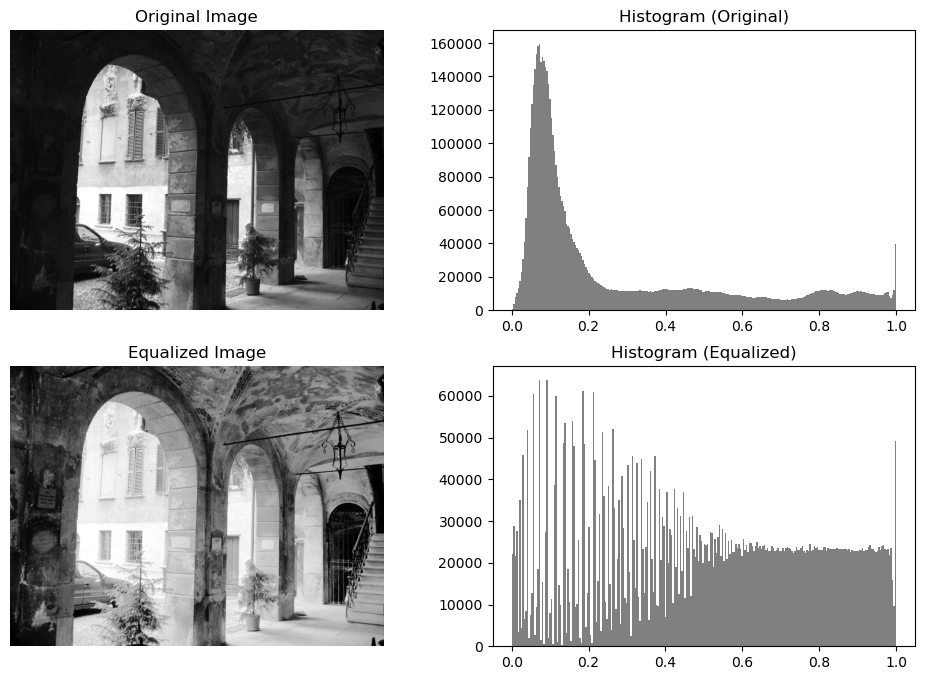

In [34]:
# Read image and convert to grayscale
image = io.imread("images/aquatermi_lowcontrast.jpg")
image_gray = color.rgb2gray(image)

# Perform histogram equalization
equalized = exposure.equalize_hist(image_gray)

# Plot original and equalized histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(image_gray, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of Original Image
axes[0, 1].hist(image_gray.ravel(), bins=256, color="gray")
axes[0, 1].set_title("Histogram (Original)")

# Equalized Image
axes[1, 0].imshow(equalized, cmap="gray")
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Histogram of Equalized Image
axes[1, 1].hist(equalized.ravel(), bins=256, color="gray")
axes[1, 1].set_title("Histogram (Equalized)")

plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




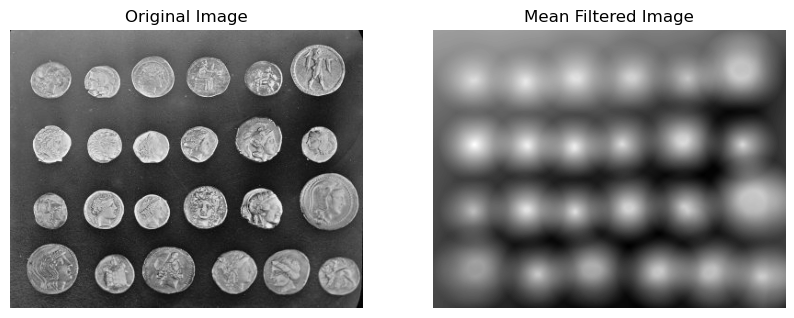

In [35]:
from skimage.filters.rank import mean

# Load coins image
coins = data.coins()

# Define structuring element
selem = disk(20)

# Apply mean filter
filtered = mean(coins, selem)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(coins, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered, cmap="gray")
axes[1].set_title("Mean Filtered Image")
axes[1].axis("off")

plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

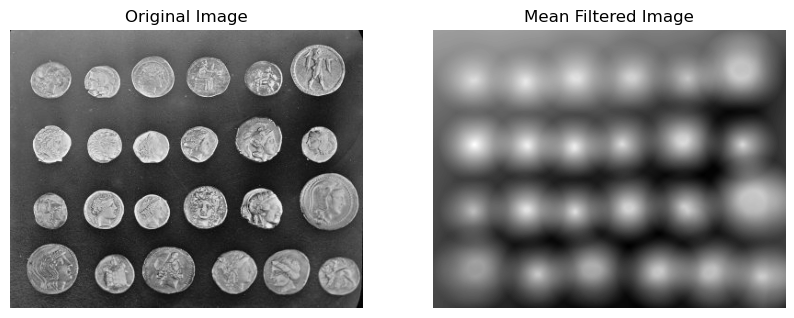

In [36]:
from skimage.filters.rank import mean

# Load coins image
coins = data.coins()

# Define structuring element
selem = disk(20)

# Apply mean filter
filtered = mean(coins, selem)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(coins, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered, cmap="gray")
axes[1].set_title("Mean Filtered Image")
axes[1].axis("off")

plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...